<a href="https://colab.research.google.com/github/NehaNeha417/ML_SHALA/blob/master/assignment9_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [157]:
data = pd.read_csv('assignment_shala_clustering.csv')
print(data.shape)

(200, 5)


In [158]:
data.head(200)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeeef9d0f0>,
      dtype=object)

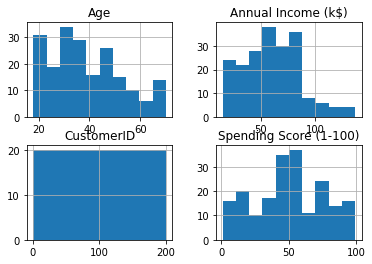

In [159]:
data.hist()

In [0]:
data.drop(['CustomerID'], axis=1,inplace=True)

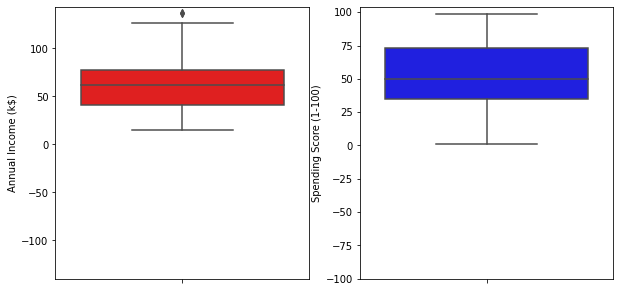

In [161]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=data["Annual Income (k$)"],color='red')
plt.ylim(0-140)
plt.subplot(1,2,2)
sns.boxplot(y=data["Spending Score (1-100)"],color='blue')
plt.ylim(0-100)
plt.show()


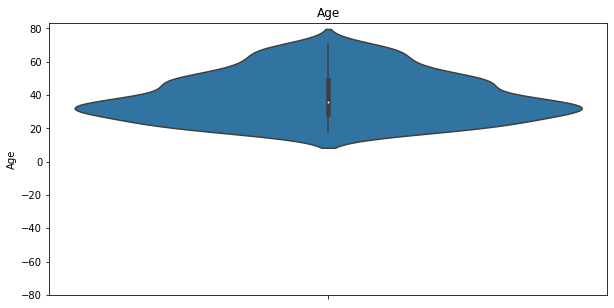

In [162]:
plt.figure(figsize=(10,5))
sns.violinplot(y=data['Age'])
plt.title('Age')
plt.ylim(20-100)
plt.ylabel('Age')
plt.show()

In [163]:
gender=data.Gender.value_counts()
print(gender)

Female    112
Male       88
Name: Gender, dtype: int64


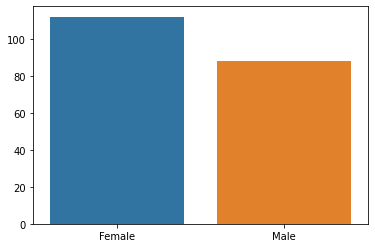

In [164]:
sns.barplot(x=gender.index,y=gender.values)

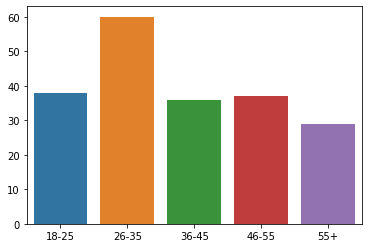

In [165]:
age18_25 = data.Age[(data.Age>=18) & (data.Age<=25)]
age26_35 = data.Age[(data.Age>=26) & (data.Age<=35)]
age36_45 = data.Age[(data.Age>=36) & (data.Age<=45)]
age46_55 = data.Age[(data.Age>=46) & (data.Age<=55)]
age_above56 = data.Age[(data.Age>=56)]

x = ['18-25','26-35','36-45','46-55','55+']
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age_above56.values)]
sns.barplot(x,y)



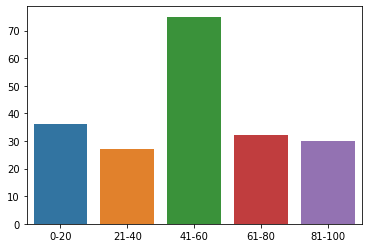

In [166]:
ss0_20 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] <=20)]
ss21_40 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=21) & (data["Spending Score (1-100)"]<=40)]
ss41_60 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=41) & (data["Spending Score (1-100)"]<=60)]
ss61_80 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=61) & (data["Spending Score (1-100)"]<=80)]
ss81_100 = data["Spending Score (1-100)"][(data["Spending Score (1-100)"] >=81) & (data["Spending Score (1-100)"]<=100)]
x = ['0-20','21-40','41-60','61-80','81-100']
y = [len(ss0_20.values),len(ss21_40.values),len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]
sns.barplot(x,y)

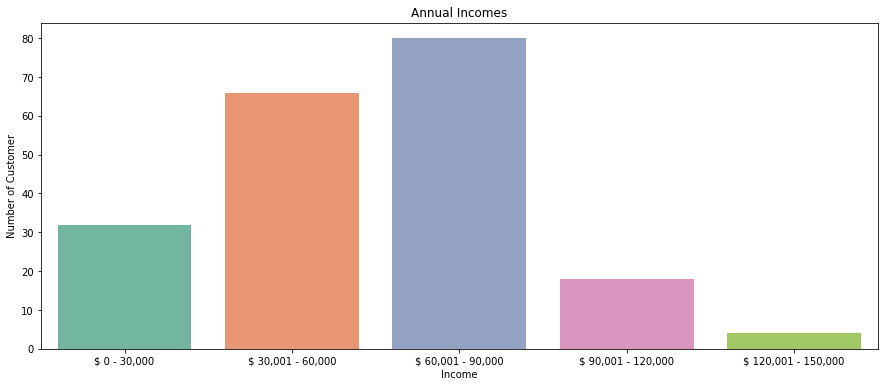

In [167]:
ai0_30 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 0) & (data["Annual Income (k$)"] <= 30)]
ai31_60 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 31) & (data["Annual Income (k$)"] <= 60)]
ai61_90 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 61) & (data["Annual Income (k$)"] <= 90)]
ai91_120 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 91) & (data["Annual Income (k$)"] <= 120)]
ai121_150 = data["Annual Income (k$)"][(data["Annual Income (k$)"] >= 121) & (data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()


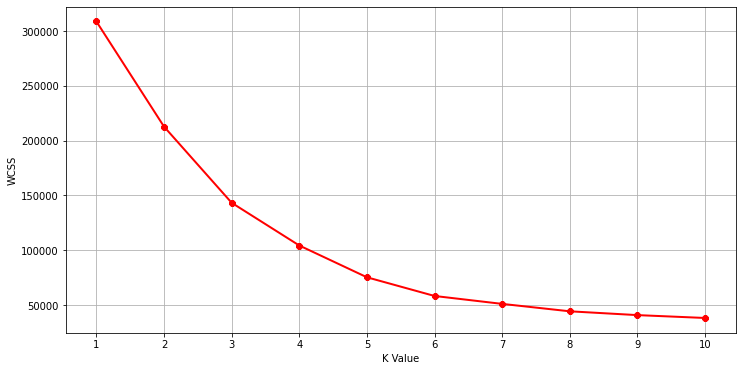

In [168]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

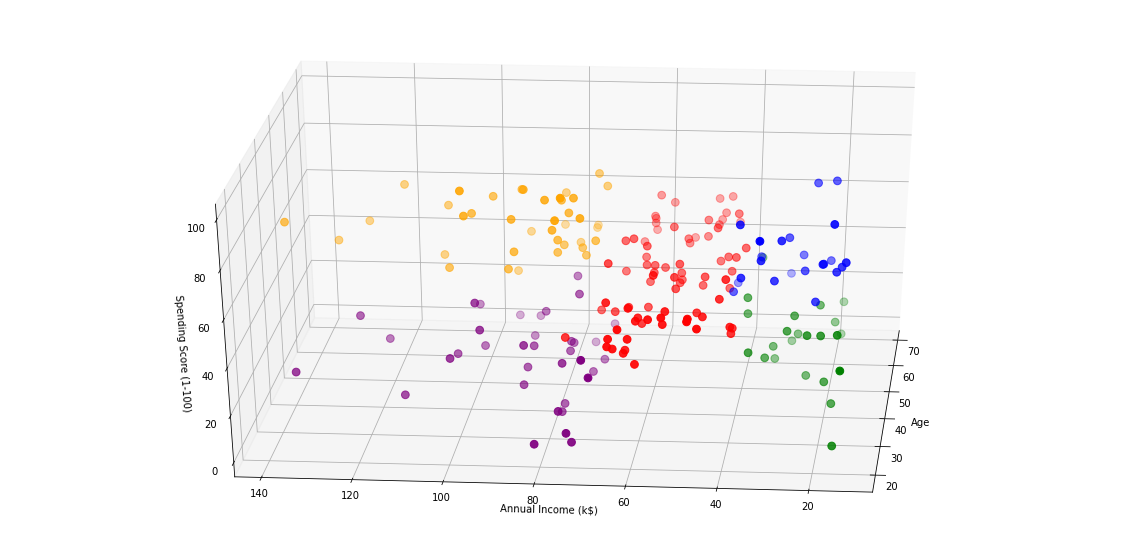

In [169]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data.iloc[:,1:])

data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[data.label == 0], data["Annual Income (k$)"][data.label == 0], data["Spending Score (1-100)"][data.label == 0], c='blue', s=60)
ax.scatter(data.Age[data.label == 1], data["Annual Income (k$)"][data.label == 1], data["Spending Score (1-100)"][data.label == 1], c='red', s=60)
ax.scatter(data.Age[data.label == 2], data["Annual Income (k$)"][data.label == 2], data["Spending Score (1-100)"][data.label == 2], c='green', s=60)
ax.scatter(data.Age[data.label == 3], data["Annual Income (k$)"][data.label == 3], data["Spending Score (1-100)"][data.label == 3], c='orange', s=60)
ax.scatter(data.Age[data.label == 4], data["Annual Income (k$)"][data.label == 4], data["Spending Score (1-100)"][data.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


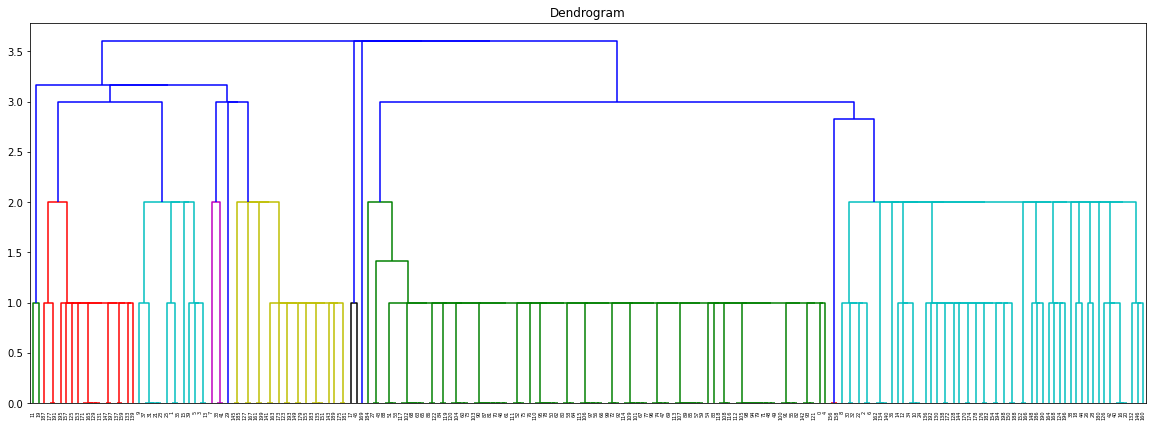

In [170]:
from scipy.cluster import hierarchy
X = np.array(data.iloc[:,3:6])
plt.figure(figsize=(20,7))
z = hierarchy.linkage(X,'single')
plt.title('Dendrogram')
dn = hierarchy.dendrogram(z)
plt.show()

In [171]:

X = np.array(data.iloc[:,3:6])
agglo_clus = AgglomerativeClustering(n_clusters=9, affinity="euclidean", 
                                     linkage="ward")
agglo_clus.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=9)

In [172]:
labels = agglo_clus.labels_
labels[:200]

array([0, 4, 7, 4, 0, 4, 7, 1, 7, 4, 3, 1, 3, 4, 3, 4, 0, 8, 5, 1, 0, 4,
       7, 4, 3, 4, 0, 6, 0, 1, 7, 4, 7, 1, 3, 4, 3, 4, 5, 4, 0, 1, 0, 6,
       5, 8, 6, 2, 0, 0, 2, 6, 6, 6, 2, 0, 2, 2, 2, 2, 6, 6, 2, 6, 2, 6,
       2, 2, 6, 2, 6, 0, 2, 6, 2, 6, 6, 2, 2, 0, 2, 6, 0, 2, 6, 2, 6, 6,
       6, 2, 6, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 6, 6, 6, 0, 2, 2, 0, 2,
       2, 6, 0, 2, 2, 2, 0, 6, 0, 6, 6, 0, 6, 1, 5, 4, 0, 1, 3, 4, 3, 4,
       0, 4, 7, 1, 7, 4, 3, 4, 7, 1, 0, 1, 3, 1, 0, 4, 5, 1, 3, 1, 5, 4,
       3, 1, 7, 4, 7, 4, 0, 4, 7, 1, 5, 4, 5, 1, 5, 8, 3, 4, 3, 1, 3, 1,
       3, 8, 3, 1, 0, 1, 3, 1, 0, 1, 5, 8, 3, 1, 5, 8, 7, 1, 3, 4, 5, 4,
       3, 4])

In [173]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 9))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.49019608e-01, 3.84105749e-01, 9.80634770e-01, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [2.52941176e-01, 9.25637660e-01, 8.30184031e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [7.54901961e-01, 9.20905518e-01, 5.52364973e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 3.72701992e-01, 1.89801093e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

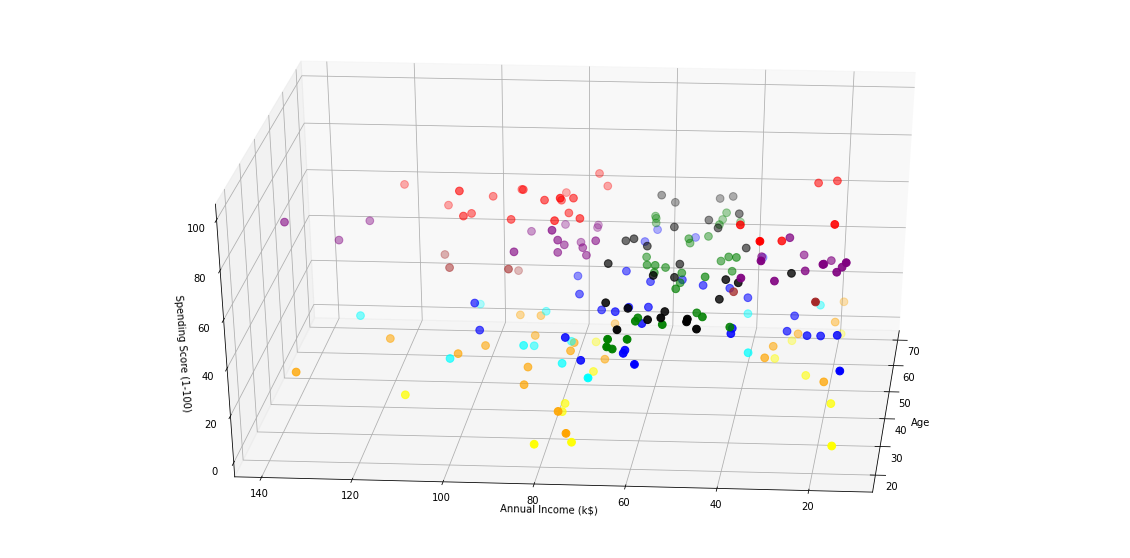

In [174]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Age[labels == 0], data["Annual Income (k$)"][labels == 0], data["Spending Score (1-100)"][labels == 0], c='blue', s=60)
ax.scatter(data.Age[labels == 1], data["Annual Income (k$)"][labels == 1], data["Spending Score (1-100)"][labels == 1], c='red', s=60)
ax.scatter(data.Age[labels == 2], data["Annual Income (k$)"][labels == 2], data["Spending Score (1-100)"][labels == 2], c='green', s=60)
ax.scatter(data.Age[labels == 3], data["Annual Income (k$)"][labels == 3], data["Spending Score (1-100)"][labels == 3], c='orange', s=60)
ax.scatter(data.Age[labels == 4], data["Annual Income (k$)"][labels == 4], data["Spending Score (1-100)"][labels == 4], c='purple', s=60)
ax.scatter(data.Age[labels == 5], data["Annual Income (k$)"][labels == 5], data["Spending Score (1-100)"][labels == 5], c='cyan', s=60)
ax.scatter(data.Age[labels == 6], data["Annual Income (k$)"][labels == 6], data["Spending Score (1-100)"][labels == 6], c='black', s=60)
ax.scatter(data.Age[labels == 7], data["Annual Income (k$)"][labels == 7], data["Spending Score (1-100)"][labels == 7], c='yellow', s=60)
ax.scatter(data.Age[labels == 8], data["Annual Income (k$)"][labels == 8], data["Spending Score (1-100)"][labels == 8], c='brown', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()
